In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "gaussian_copula"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.059932,0.050680,0.008418,0.073571,0.111969,0.092494,-0.068922,0.091721,0.133599,0.132601,312.0
1,0.057962,0.050680,0.074951,0.001572,-0.027101,-0.021245,-0.037436,0.004459,0.029483,0.062402,186.0
2,-0.021220,-0.044642,0.052373,0.009842,-0.004563,-0.026103,0.025031,-0.016376,0.002594,-0.020294,237.0
3,-0.043240,-0.044642,-0.008512,-0.063361,-0.033974,-0.038854,-0.006398,-0.031642,-0.000785,-0.024516,190.0
4,-0.107226,0.050680,0.006323,-0.022187,-0.076750,-0.059167,-0.045185,-0.019222,-0.046294,-0.029546,97.0
5,0.014316,-0.044642,-0.024389,-0.035774,0.041392,0.028635,0.003879,0.011093,0.015282,-0.000745,63.0
6,-0.033473,0.050680,-0.006322,-0.042534,-0.038745,-0.033755,0.061568,-0.021298,-0.062376,0.014525,43.0
7,-0.006824,0.050680,0.013056,0.052683,0.007431,0.021673,-0.038585,0.021240,0.007810,-0.000143,94.0
8,0.034498,0.050680,-0.053916,-0.029966,0.086419,0.063403,0.016000,0.039835,0.028311,0.006617,39.0
9,-0.053368,0.050680,-0.026622,-0.011151,-0.067999,-0.048589,-0.020851,-0.034040,-0.021644,-0.095421,130.0


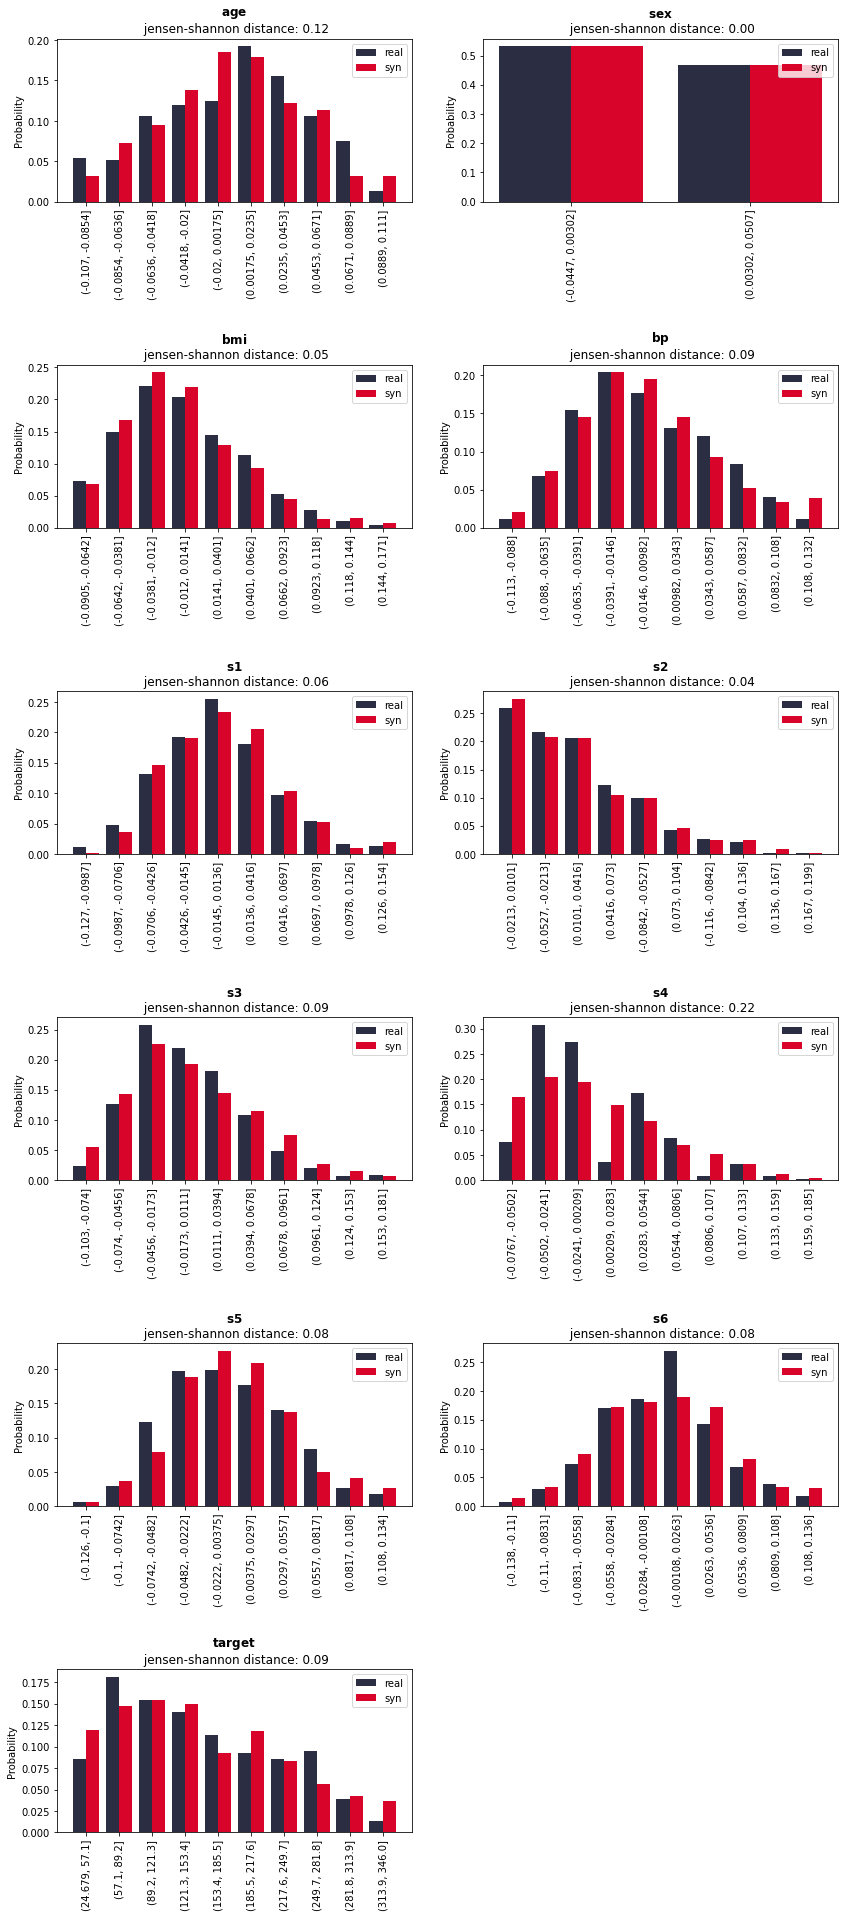

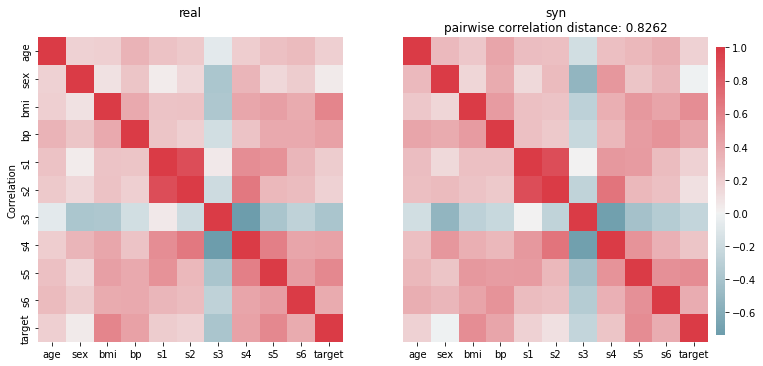

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : gaussian_copula


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.035899,0.121582,0.085639,0.036315,0.099437,0.042842,3,0,0.01
sanity.inlier_probability,0.742081,0.993213,0.848416,0.106070,0.809955,0.125566,3,0,0.01
sanity.outlier_probability,0.002262,0.004525,0.003771,0.001067,0.004525,0.001131,3,0,0.01
statistical.marginal.jensenshannon_distance,0.080152,0.082371,0.080950,0.001007,0.080328,0.001110,3,0,0.19
statistical.marginal.chi_squared_test,0.812886,0.998685,0.905011,0.075860,0.903461,0.092900,3,0,0.02
statistical.joint.feature_correlation,0.611276,0.685071,0.651840,0.030570,0.659171,0.036898,3,0,0.12
statistical.marginal.inverse_cdf_distance,0.168201,0.169908,0.169329,0.000798,0.169878,0.000853,3,0,3.50
statistical.marginal.inverse_kl_divergence,0.959305,0.967073,0.964278,0.003525,0.966457,0.003884,3,0,0.02
